- bateau animation
- moyenne glissante ??
- bathymetrie 

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
import gsw 

from T_S_diagram import ts_diagram

from data_loading import get_LADCP, get_SADCP,get_CTD,get_2021_CTD_data


In [50]:
# Load the data from the file
year = 2019

SADCP = get_SADCP(year)
LADCP = get_LADCP(year)
CTD = get_CTD(year)

proj = ccrs.Mercator(central_longitude=4.5, min_latitude=38.0, max_latitude=45.0)

(780, 66)


## Comparing paths for CTD , SADCP and LADCP

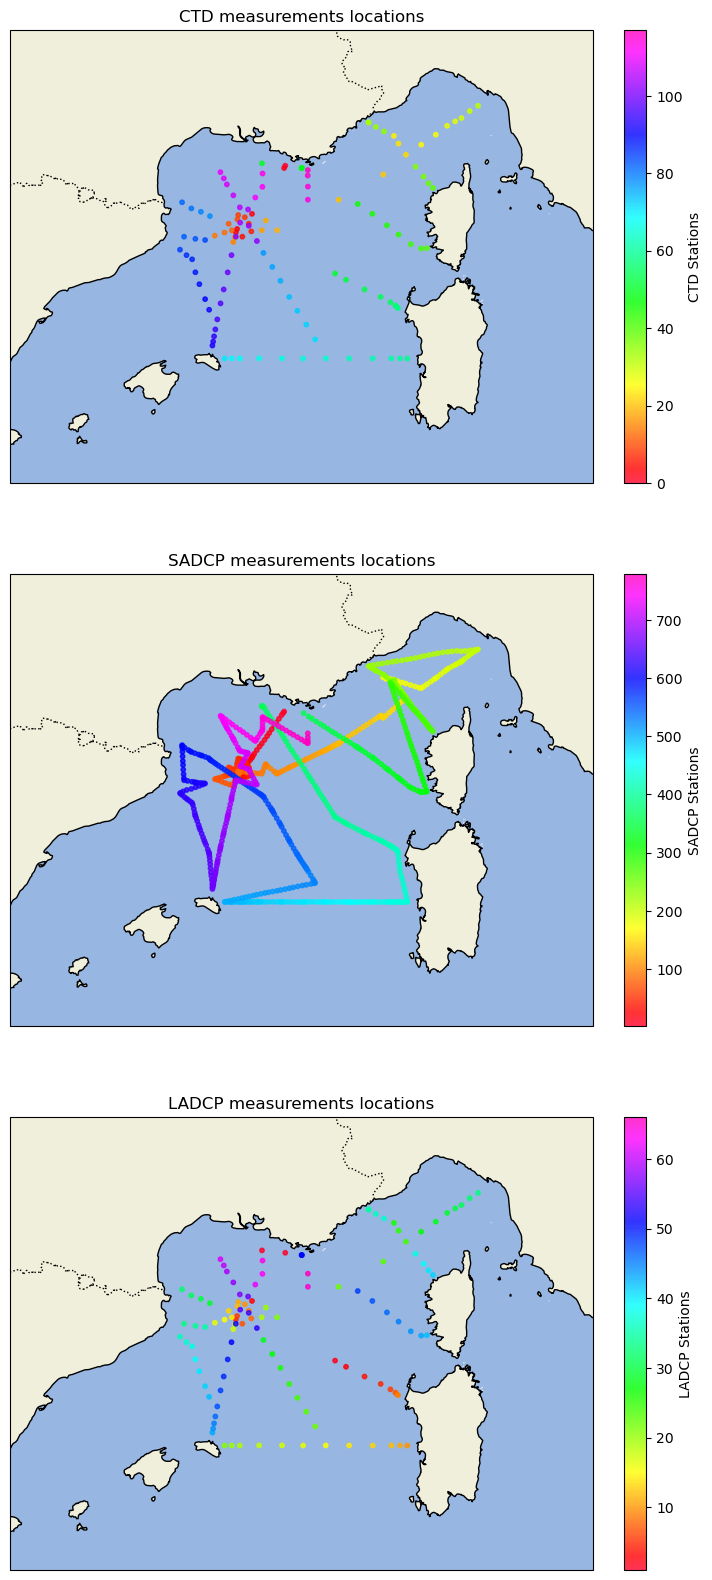

In [51]:
fig, ax = plt.subplots(3,1,figsize=(20,20),subplot_kw={'projection': proj})
ax.flatten()

sc = ax[0].scatter (CTD['longitude'],CTD['latitude'], s=10, c=CTD['idx'], cmap='gist_rainbow', alpha=0.8,  transform=ccrs.PlateCarree())
ax[0].set_extent([0, 12, 38, 45])
ax[0].add_feature(cfeature.LAND)
ax[0].add_feature(cfeature.COASTLINE)
ax[0].add_feature(cfeature.OCEAN)
ax[0].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[0], orientation='vertical', pad=0.02)
cbar.set_label('CTD Stations')
ax[0].set_title('CTD measurements locations')



sc = ax[1].scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8, transform=ccrs.PlateCarree())
ax[0].set_extent([0, 12, 38, 45])
ax[1].set_extent([0, 12, 38, 45])
ax[1].add_feature(cfeature.LAND)
ax[1].add_feature(cfeature.COASTLINE)
ax[1].add_feature(cfeature.OCEAN)
ax[1].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[1], orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax[1].set_title('SADCP measurements locations')


sc = ax[2].scatter (LADCP['longitude'],LADCP['latitude'], s=10, c=LADCP['idx'], cmap='gist_rainbow', alpha=0.8,transform=ccrs.PlateCarree())
ax[0].set_extent([0, 12, 38, 45])
ax[2].set_extent([0, 12, 38, 45])
ax[2].add_feature(cfeature.LAND)
ax[2].add_feature(cfeature.COASTLINE)
ax[2].add_feature(cfeature.OCEAN)
ax[2].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[2], orientation='vertical', pad=0.02)
cbar.set_label('LADCP Stations')
ax[2].set_title('LADCP measurements locations')

plt.show()

## Choosing a path that passes through the front for SADCP

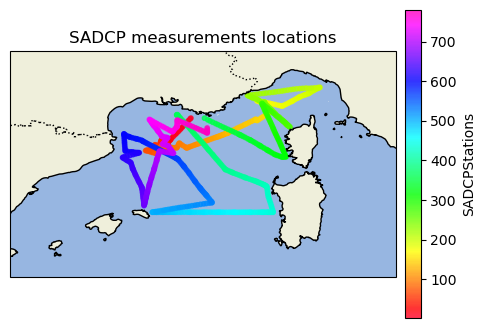

In [52]:
fig, ax = plt.subplots(1,1,figsize=(6,4),subplot_kw={'projection': ccrs.PlateCarree()})

N0 = 1
N1 = 780
sc = ax.scatter (SADCP['longitude'][N0:N1],SADCP['latitude'][N0:N1], s=10, c=SADCP['idx'][N0:N1], cmap='gist_rainbow', alpha=0.8)
ax.set_extent([0, 12, 38, 45])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

In [53]:
Coupe1 = SADCP.where((SADCP['idx'] > N0) & (SADCP['idx'] < N1), drop=True)

In [54]:
Coupe1['depth']

<xarray.DataArray 'depth' (depth: 66)> Size: 528B
array([  20.309999,   28.309999,   36.310001,   44.310001,   52.310001,
         60.310001,   68.309998,   76.309998,   84.309998,   92.309998,
        100.309998,  108.309998,  116.309998,  124.309998,  132.309998,
        141.889999,  165.889999,  189.889999,  213.889999,  237.889999,
        261.890015,  285.890015,  309.890015,  333.890015,  357.890015,
        381.890015,  405.890015,  429.890015,  453.890015,  477.890015,
        501.890015,  525.890015,  549.890015,  573.890015,  597.890015,
        621.890015,  645.890015,  669.890015,  693.890015,  717.890015,
        741.890015,  765.890015,  789.890015,  813.890015,  837.890015,
        861.890015,  885.890015,  909.890015,  933.890015,  957.890015,
        981.890015, 1005.890015, 1029.890015, 1053.890015, 1077.890015,
       1101.890015, 1125.890015, 1149.890015, 1173.890015, 1197.890015,
       1221.890015, 1245.890015, 1269.890015, 1293.890015, 1317.890015,
               nan])
Coordinates:
  * depth    (depth) float64 528B 20.31 28.31 36.31 ... 1.294e+03 1.318e+03 nan

In [55]:
Coupe1 = Coupe1.isel(depth=slice(0,-1))
depth_200m = Coupe1.isel(depth=slice(0,20))
Coupe1


<xarray.Dataset> Size: 841kB
Dimensions:    (time: 778, depth: 65)
Coordinates:
  * time       (time) datetime64[ns] 6kB 2019-06-08T12:36:00 ... 2019-07-01T0...
  * depth      (depth) float64 520B 20.31 28.31 36.31 ... 1.294e+03 1.318e+03
    latitude   (time) float64 6kB 42.93 42.89 42.84 42.78 ... 42.47 42.51 42.56
    longitude  (time) float64 6kB 5.624 5.593 5.538 5.484 ... 6.133 6.133 6.132
    idx        (time) int64 6kB 2 3 4 5 6 7 8 9 ... 773 774 775 776 777 778 779
    leg        (time) float64 6kB 1.0 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0 2.0
Data variables:
    U          (time, depth) float64 405kB -0.1803 -0.1799 ... 0.04368 nan
    V          (time, depth) float64 405kB -0.1452 -0.1452 ... -0.07584 nan
Attributes:
    year:     2019
    source:   MOOSE cruises

## Hovmöller Diagrams (speeds / (depth and stations))

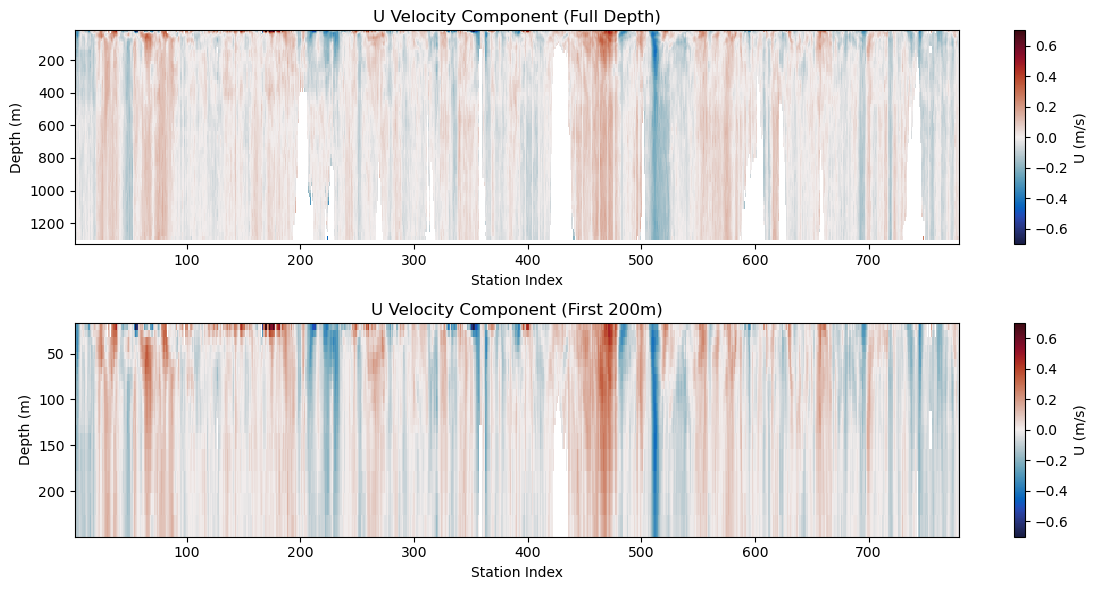

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot for the entire depth range
c = ax[0].pcolormesh(Coupe1['idx'], Coupe1['depth'], Coupe1['U'].T, cmap=cmo.balance, vmin = -0.7,vmax = 0.7, shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('U Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('U (m/s)')
ax[0].invert_yaxis()

# Plot for the first 200 meters

c = ax[1].pcolormesh(depth_200m['idx'], depth_200m['depth'], depth_200m['U'].T, cmap=cmo.balance,vmin = -0.7,vmax = 0.7, shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('U Velocity Component (First 200m)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('U (m/s)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


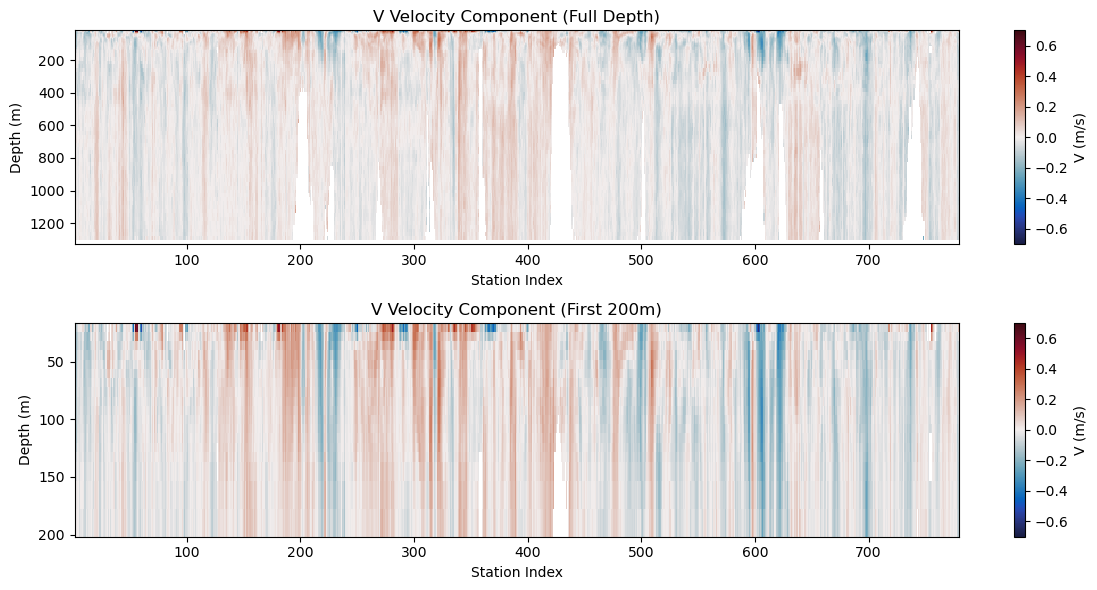

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot for the entire depth range
c = ax[0].pcolormesh(Coupe1['idx'], Coupe1['depth'], Coupe1['V'].T, cmap=cmo.balance,vmin = -0.7,vmax = 0.7, shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('V Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('V (m/s)')
ax[0].invert_yaxis()

# Plot for the first 200 meters
depth_200m = Coupe1.sel(depth=slice(0, 200))
c = ax[1].pcolormesh(depth_200m['idx'], depth_200m['depth'], depth_200m['V'].T, cmap=cmo.balance,vmin = -0.7,vmax = 0.7,  shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('V Velocity Component (First 200m)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('V (m/s)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

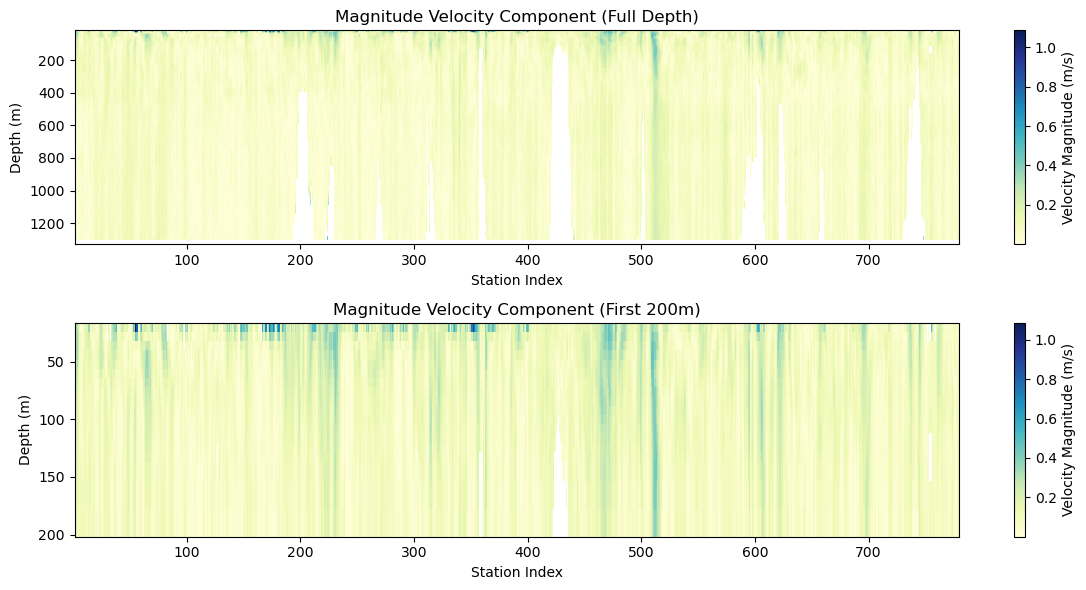

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot for the entire depth range
c = ax[0].pcolormesh(Coupe1['idx'], Coupe1['depth'], np.sqrt(Coupe1['U'].T**2 + Coupe1['V'].T**2), cmap='YlGnBu', shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Magnitude Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('Velocity Magnitude (m/s)')
ax[0].invert_yaxis()

# Plot for the first 200 meters
depth_200m = Coupe1.sel(depth=slice(0, 200))
c = ax[1].pcolormesh(depth_200m['idx'], depth_200m['depth'], np.sqrt(depth_200m['U'].T**2 + depth_200m['V'].T**2), cmap='YlGnBu', shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Magnitude Velocity Component (First 200m)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('Velocity Magnitude (m/s)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

# mhhhhh

In [66]:
Fleche = SADCP.isel(depth = slice(0,5) )
Fleched = Fleche.mean('depth')
Fleche
Fleche.latitude.shape


(780,)

In [67]:
Fleched.U.shape

(780,)

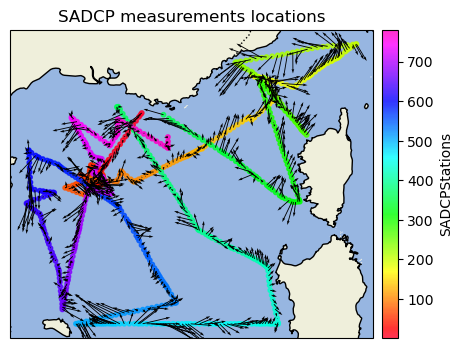

In [77]:

fig, ax = plt.subplots(1,1,figsize=(6,4),subplot_kw={'projection': proj})

sc = ax.scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleched['longitude'], Fleched['latitude'], Fleched['U'],Fleched['V'],  transform=ccrs.PlateCarree(), scale=4, color='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

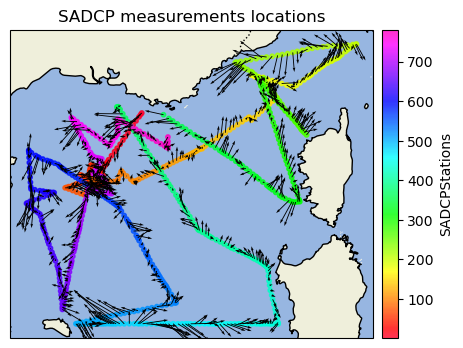

In [79]:
Fleche1 = SADCP.isel(depth = 3 )
fig, ax = plt.subplots(1,1,figsize=(6,4),subplot_kw={'projection': proj})

sc = ax.scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleche1['longitude'], Fleche1['latitude'], Fleche1['U'],Fleche1['V'],  transform=ccrs.PlateCarree(), scale=4, color='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

